In [4]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')
from arch import arch_model
from statsmodels.stats.diagnostic import het_arch
from statsmodels.graphics.tsaplots import plot_pacf


In [11]:
df = pd.read_excel(r'C:\Users\ASUS\Desktop\Bond.xlsx', index_col=0, parse_dates=True)
data = df[['Ngày giao kết giao dịch','Giá yết (đồng)']]
data.head()

,Ngày giao kết giao dịch,Giá yết (đồng)
STT,,
1,2021-09-08,134.382
2,2021-11-08,143.522
3,2021-10-08,119.689
4,2021-10-08,120.504
5,2021-09-08,125.002


In [15]:
returns = 100* data['Giá yết (đồng)'].pct_change().dropna()
returns.head()

STT
2     6.801506
3   -16.605817
4     0.680931
5     3.732656
6    -2.795955
Name: Giá yết (đồng), dtype: float64

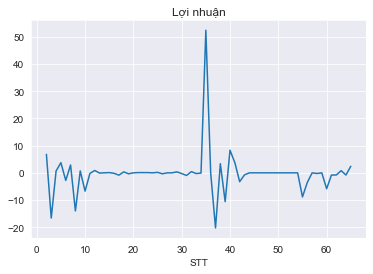

In [18]:
returns.plot(title= 'Lợi nhuận');

In [25]:
arch_test= het_arch(returns)
print(f'Sai số lớn nhất: {arch_test[0]}');
print(f'P_value: {arch_test[1]}');
if arch_test[1] > 0.1:
    print('Chấp nhận giả thiết H0')
    print('Không có hiệu ứng ARCH')
else:
    print('Bác bỏ giả thiết H0')
    print('Có hiệu ứng ARCH')


Sai số lớn nhất: 1.1612430608019597
P_value: 0.999892814119329
Chấp nhận giả thiết H0
Không có hiệu ứng ARCH


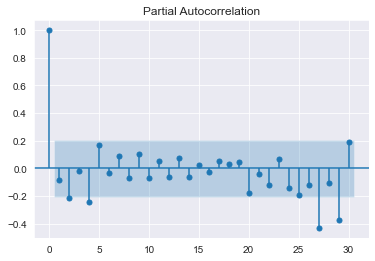

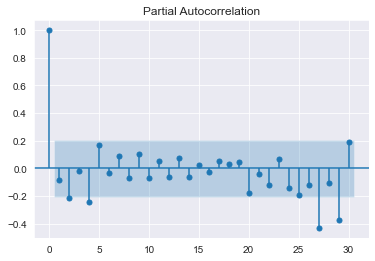

In [32]:
plot_pacf(returns, lags=30,alpha=0.1)

In [34]:
model = arch_model(returns,mean='Zero',vol='ARCH',p=2,o=0,q=0)
model_fitted= model.fit(disp='off')
model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Zero Mean - ARCH Model Results                        
==============================================================================
Dep. Variable:         Giá yết (đồng)   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.016
Vol Model:                       ARCH   Log-Likelihood:               -222.286
Distribution:                  Normal   AIC:                           450.572
Method:            Maximum Likelihood   BIC:                           457.049
                                        No. Observations:                   64
Date:                Wed, Aug 11 2021   Df Residuals:                       64
Time:                        11:15:04   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega         57.9217     44.575      1.299      0.194    [-29.443,1.453e+02]
alpha[1]   1.3560e-09  2.753e-02  4.926e-08      1.000 [-5.396e-02,5.396e-02]
alpha[2]       0.0741  4.303e-02      1.722  8.502e-02   [-1.023e-02,  0.158]
=============================================================================

Covariance estimator: robust
"""